In [1]:
#@title **Montando el drive** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA-PROJECT')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/IA-PROJECT


In [2]:
#@title **Cargando libreria** { display-mode: "form" }

from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
#@title **Importacion del conjunto de datos**
df_mat = pd.read_csv("csv/student-mat.csv", sep=";" )
X = df_mat.values[:,:-1]
y = df_mat.values[:,-1]
print(X.shape, y.shape)
df_mat.head()

(395, 32) (395,)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#@title **Explorando datos**
df_mat.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [ ]:
#@title **Informacion del conjunto de datos**
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
#@title Correlacion del conjunto de datos
df_mat.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


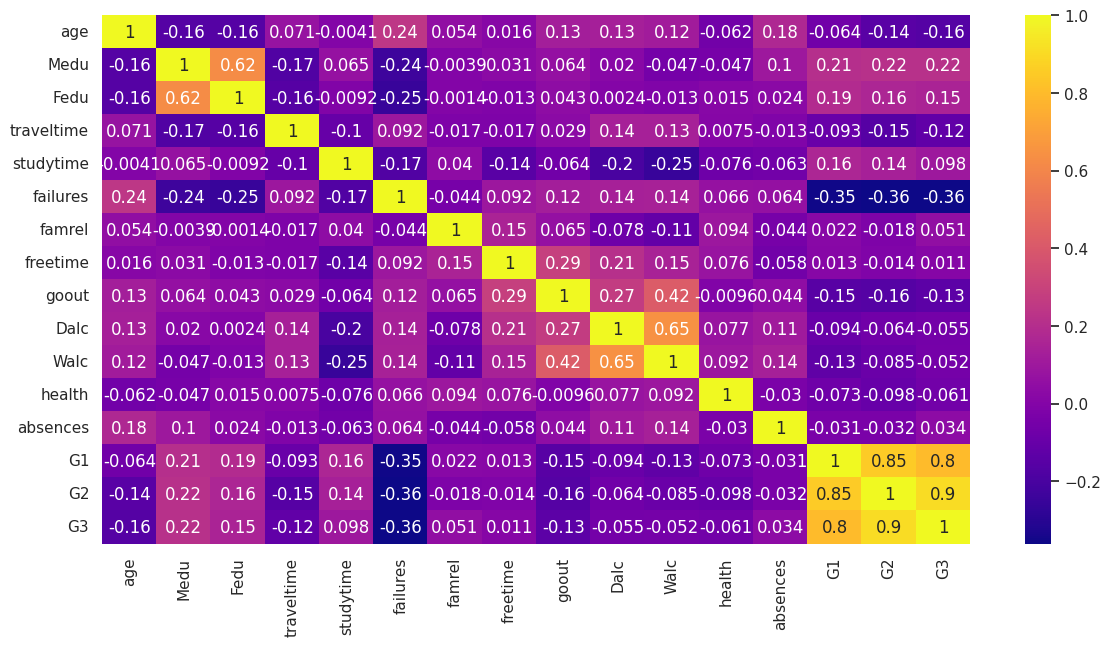

In [ ]:
plt.figure(figsize=(14,7), dpi=100)
sns.heatmap(df_mat.corr(), cmap='plasma', annot=True)

Como G1 y G2 están altamente correlacionados con G3, nuestra caracteristica objetivo, descartaremos G1 y G2 para el entrenamiento.

In [ ]:
#@title Cambiamos las propiedades objeto en caracteristica por categoria
for labels, content in df_mat.items():
    if pd.api.types.is_string_dtype(content):
        df_mat[labels] = content.astype("category").cat.as_ordered()

In [ ]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [ ]:
#@title **Ahora los valores de nuestras categorias los cambiamos a valores numericos tratables**
for labels, content in df_mat.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_mat[labels] = pd.Categorical(content).codes

In [ ]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#@title **Separamos los datos en X , y**
X = df_mat.drop(['G1','G2','G3'], axis=1)
y = df_mat['G3']

In [ ]:
X.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,4


In [ ]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
#@title **entrenamiento**
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data = df_mat.drop(['G1','G2','G3'], axis=1)
data_y = df_mat['G3']
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, shuffle=False)
est =  RandomForestRegressor()
est.fit(X_train, y_train)
pred = est.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(pred,mse)

[ 9.46 11.09  5.47 10.92 11.59 10.81 12.17 11.03  7.48 11.97  9.83 11.2
 12.66 11.35 12.19  9.11 10.28  6.24  4.22 11.66 10.03 11.28 12.59 11.75
  9.8   7.9  11.77  4.74  9.53 12.14 11.44  8.04 10.64  9.25  9.15 11.46
 10.47  9.05 11.41  9.26 11.68 11.49 11.81  7.19  3.69  9.76 10.62  4.9
  9.97  8.96 11.01  7.13  3.59 11.82  9.65  9.92  9.6  12.47 10.12 11.85
  9.02 12.2  10.    9.94 12.68 11.16 12.12  7.89 10.23 10.44  9.02  7.17
  9.11  6.61  8.58 11.15  9.08 10.83 10.38] 20.667031645569615


In [ ]:
#Regresiones
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#1 impacto de caracteristicas relacionadas con la familia y el desempeño del estudiante 
X=df_mat[['famsup','Medu', 'Fedu','famrel']]
y=df_mat['G3']
#Estandarizacion de datos
X=StandardScaler().fit_transform(X)
print(X)
#datos de entrenamiento y testeo 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
logisticRegr = LogisticRegression(max_iter=150)
logisticRegr.fit(X_train, y_train)
predictions=logisticRegr.predict(X_test)
print(predictions)
#intento de acercamiento por regression discreta
#Claramente es un problema de DL deep learning metodo de activacion Sigmoid


model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(316,)),
    tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])



model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=5)


[[-1.25765629  1.14385567  1.36037064  0.06219406]
 [ 0.7951298  -1.60000865 -1.39997047  1.17886012]
 [-1.25765629 -1.60000865 -1.39997047  0.06219406]
 ...
 [-1.25765629 -1.60000865 -1.39997047  1.17886012]
 [-1.25765629  0.22923423 -0.47985677  0.06219406]
 [-1.25765629 -1.60000865 -1.39997047 -1.054472  ]]
[11 10 10 10 11 10  0 14 10 11 10 13 13 13 14 13 11 15 10 10 11 10 15 11
 10 10 10 11 14 11 13 15 10 11 10 10 10  0 10 13 16 10 13 10 13 11  0 10
 10 10 10 10 10 11 10 10 10 10 11 15 11 11 11 13 14  0 10 10 10 10 11 14
 10 14 10 10 10 10 10]


In [ ]:
_#@title **code** To read the dataset
d = pd.read_csv("csv/student-por.csv", sep=";" )
print(d.shape)
X = d.values[:,:-1]
y = d.values[:,-1]
print(X.shape, y.shape)
d.head()

(649, 33)
(649, 32) (649,)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
